## 房屋朝向的分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

In [2]:
# load data 
houses = pd.read_csv(r"./model_data/predicts/houses_pred_all.csv")

In [3]:
houses['city'].value_counts()

C    2995
H    2993
S    2983
K     568
Name: city, dtype: int64

In [4]:
# 从全部数据中 对 city 进行分组，分为4个城市
km = houses[houses.city=="K"]
cd = houses[houses.city=="C"]
hz = houses[houses.city=="H"]
sh = houses[houses.city=="S"]

In [5]:
# 定义一个列表和元祖，分别存放四个城市的 数据集对象 和 城市名称
city_list = [km, cd, hz, sh]
city_names = ("昆明", "成都", "杭州", "上海")

In [6]:
# 设置matplotlib正常显示中文和负号，用黑体显示中文 
matplotlib.rcParams['font.sans-serif']=['SimHei'] 
matplotlib.rcParams['axes.unicode_minus']=False 

In [7]:
# def towards_piechart(city, city_name):
#     city.towards.value_counts().plot(kind='pie', figsize=(5,5));
#     plt.title("{}市房屋朝向分布图".format(city_name))
#     plt.axis("equal")
#     plt.show()

In [8]:
# 昆明
# towards_piechart(km, city_names[0])

In [9]:
# 成都
# towards_piechart(cd, city_names[1])

In [10]:
# 杭州
# towards_piechart(hz, city_names[2])

In [11]:
# 上海
# towards_piechart(sh, city_names[3])

In [12]:
# 房屋朝向的条形图
def towards_barchart(city, city_name):
    plt.title("{}市房屋朝向分布图".format(city_name))
    plt.xlabel("towards")
    plt.ylabel("Mount")
    # 设置x轴上分类的索引
    plt.xticks(np.arange(len(city['towards'].value_counts()))+0.5, city['towards'].value_counts().index)
    # 设置抽的取值范围
    # plt.axis([0,25, 0,2000])
    plt.bar(np.arange(len(city['towards'].value_counts()))+0.5, city['towards'].value_counts())
    # 设置对应柱状图的 高度显示
    for x,y in zip(np.arange(len(city['towards'].value_counts()))+0.5, city['towards'].value_counts()):
        plt.text(x,y,y, ha="center", va="bottom")
    plt.show()

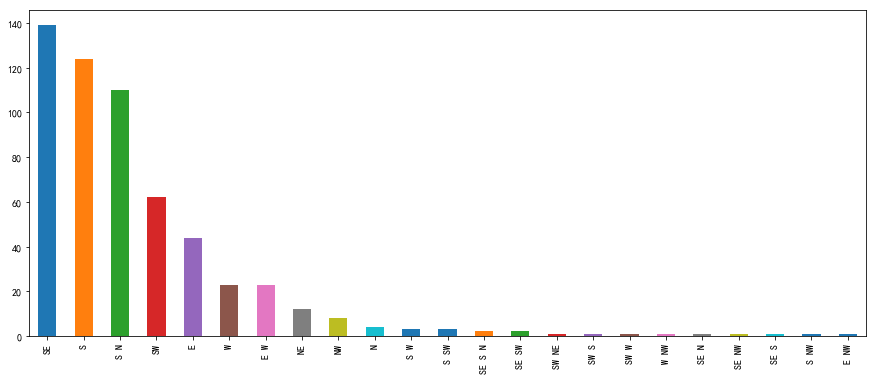

In [13]:
# towards 分类柱状图
km.towards.value_counts().plot(kind='bar', figsize=(15,6))

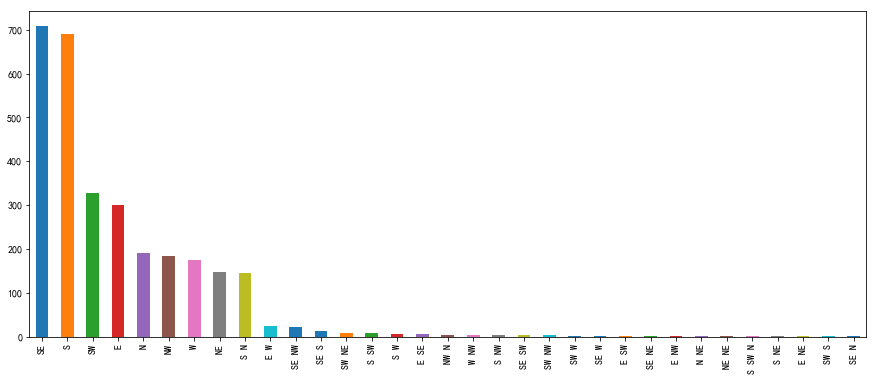

In [14]:
# towards 分类柱状图
cd.towards.value_counts().plot(kind='bar', figsize=(15,6))

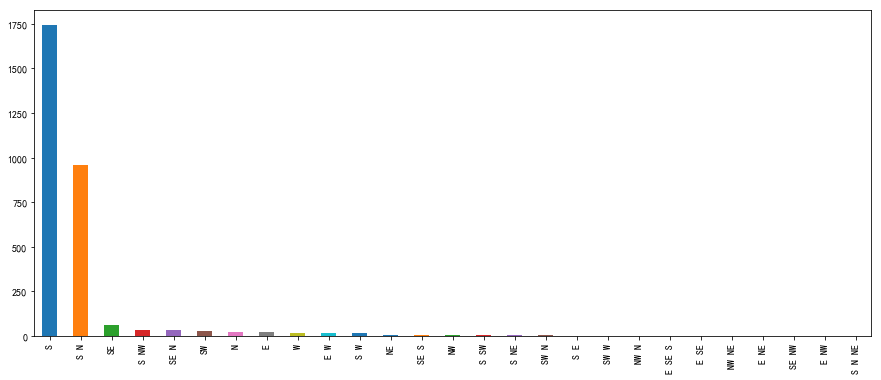

In [15]:
# towards 分类柱状图
hz.towards.value_counts().plot(kind='bar', figsize=(15,6))

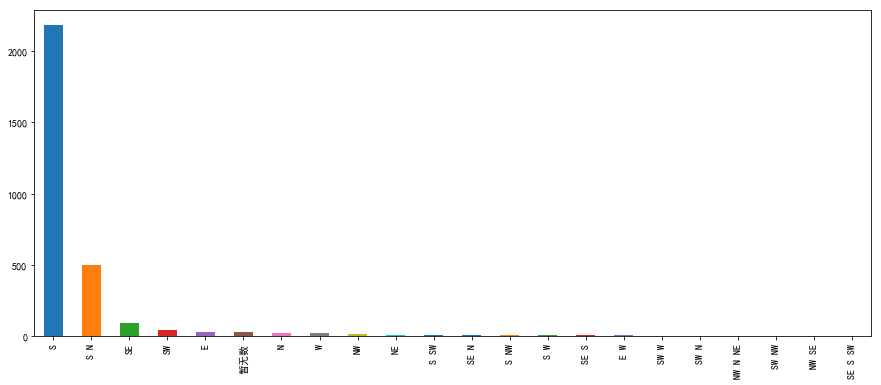

In [16]:
# towards 分类柱状图
sh.towards.value_counts().plot(kind='bar', figsize=(15,6))

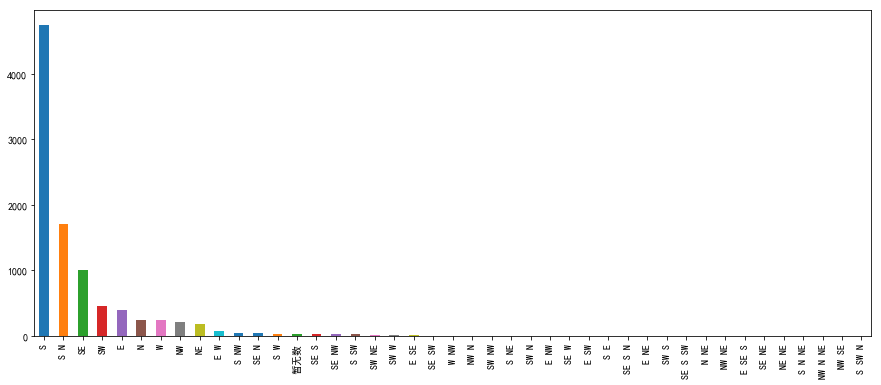

In [17]:
# 4个城市 towards 总分类柱状图
houses.towards.value_counts().plot(kind='bar', figsize=(15,6))

In [18]:
# 每个城市房屋朝向分类汇总的情况
km_towards = km.towards.value_counts()
cd_towards = cd.towards.value_counts()
hz_towards = hz.towards.value_counts()
sh_towards = sh.towards.value_counts()
# 4个城市所有房屋朝向的总体情况
all_city_towards = houses.towards.value_counts()

In [19]:
# 所有城市房屋朝向数据的列表
city_tow_list = [km_towards, cd_towards, hz_towards, sh_towards]

In [20]:
def toward_top5_plot(city_towards, name):
    asd, sdf = plt.subplots(1,1,dpi=100)  #设置画布
    city_towards.head(5).plot(kind='bar',x='towards',y='mount',title='{}市房产朝向 TOP5 分布'.format(name), ax=sdf)  #朝向排名前5的统计
    plt.legend(['数量'])
    plt.show()

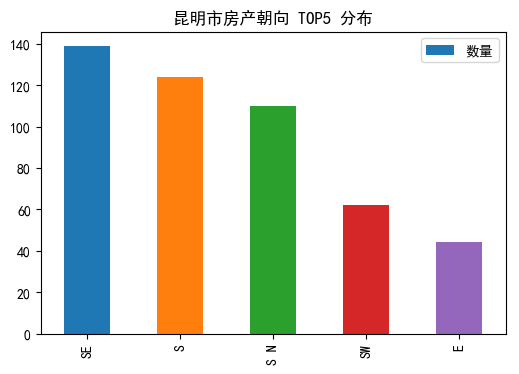

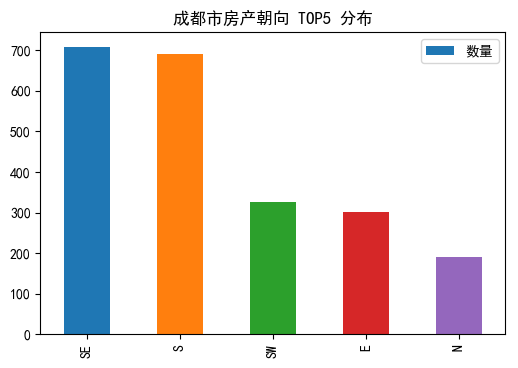

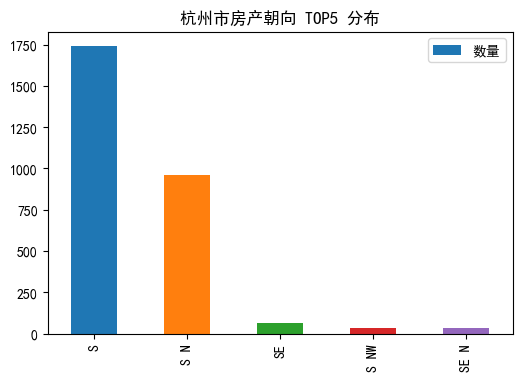

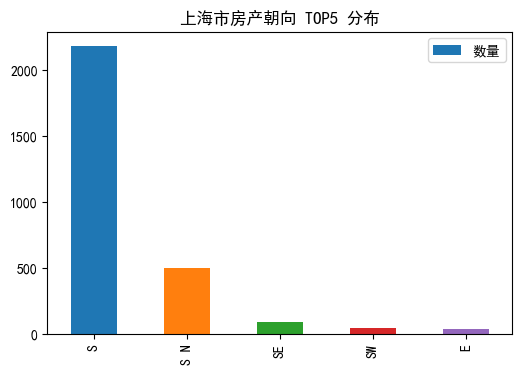

In [21]:
# 四个城市 towards_top5 的柱状图
for toward,city_name in zip(city_tow_list, city_names):
    toward_top5_plot(toward,city_name)

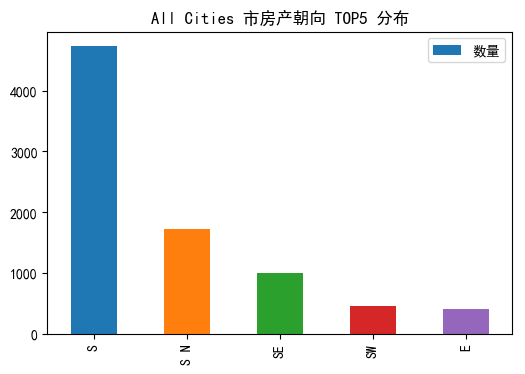

In [22]:
toward_top5_plot(all_city_towards,"All Cities ")

### 结论： 根据以上条形图可知，4个城市中，昆明和成都房产朝向top5具有相似性，杭州和上海房产朝向也相似；并且昆明，成都朝向以 SE, S的最多，杭州和上海的朝向以 S, SN 的最多。

In [23]:
def towards_top5_rate(city, city_tow):
    # 各城市房屋朝向 top5 房产数量的比重
    top5_rates = list(city_tow[:5].values / len(city))
    top5_rates = map(lambda t:round(t, 4), top5_rates)
    top5_towards = list(city_tow[:5].index)
    top5_map = dict(zip(top5_towards, top5_rates))
    
    return top5_map

In [24]:
# 各个城市房屋朝向 top5 比重
# for city,city_tow in zip(city_list, city_tow_list):
#     print(towards_top5_rate(city, city_tow))

km_tow_map = towards_top5_rate(city_list[0], city_tow_list[0])
cd_tow_map = towards_top5_rate(city_list[1], city_tow_list[1])
hz_tow_map = towards_top5_rate(city_list[2], city_tow_list[2])
sh_tow_map = towards_top5_rate(city_list[3], city_tow_list[3])

In [25]:
# 4个城市房屋朝向 top5 的总体情况
all_tow_map = towards_top5_rate(houses, all_city_towards)

 - 4城市 房屋朝向 TOP5 的房产 占总数的比重

In [26]:
km_tow_map

{'SE': 0.2447, 'S': 0.2183, 'S N': 0.1937, 'SW': 0.1092, 'E': 0.0775}

In [27]:
cd_tow_map

{'SE': 0.2364, 'S': 0.2307, 'SW': 0.1092, 'E': 0.1005, 'N': 0.0638}

In [28]:
hz_tow_map

{'S': 0.582, 'S N': 0.3211, 'SE': 0.0204, 'S NW': 0.011, 'SE N': 0.0107}

In [29]:
sh_tow_map

{'S': 0.7318, 'S N': 0.1673, 'SE': 0.0305, 'SW': 0.0151, 'E': 0.0104}

In [30]:
all_tow_map

{'S': 0.4969, 'S N': 0.1798, 'SE': 0.1047, 'SW': 0.0481, 'E': 0.0418}

### 比较1: 昆明和成都， 最受欢迎的50套房产中（popular top50），朝向为 SE, S, SW 的房产比例

In [31]:
# 根据受欢迎程度popular,选出前50的房产信息
km_popular50 = km.sort_values("popular", ascending=False).head(50)
cd_popular50 = cd.sort_values("popular", ascending=False).head(50)

In [32]:
def towards_top3_in_popular50(city_popular50, tow_top3_list):
    # 该函数计算popular前50的房产中，朝向top3的房产数量比例
    popular50_top3_map = {}
    for t in tow_top3_list:
        num = len(city_popular50[city_popular50.towards == t])
        popular50_top3_map[t] = round(num/50, 4)
        
    return popular50_top3_map

In [33]:
# 昆明市 popular前50的房产中，'SE', 'S', 'SW' 朝向的房产比例的字典
km_popular50_tow_map = towards_top3_in_popular50(km_popular50, ['SE', 'S', 'SW'])
km_popular50_tow_map

{'SE': 0.32, 'S': 0.24, 'SW': 0.12}

In [34]:
# 成都市 popular前50的房产中，'SE', 'S', 'SW' 朝向的房产比例的字典
cd_popular50_tow_map = towards_top3_in_popular50(cd_popular50, ['SE', 'S', 'SW'])
cd_popular50_tow_map

{'SE': 0.2, 'S': 0.22, 'SW': 0.1}

### 比较2: 杭州和上海， 最受欢迎的50套房产中（popular top50），朝向为 S, S N, SE 的房产比例

In [35]:
# 根据受欢迎程度popular,选出前50的房产信息
hz_popular50 = hz.sort_values("popular", ascending=False).head(50)
sh_popular50 = sh.sort_values("popular", ascending=False).head(50)

In [36]:
# 杭州市 popular前50的房产中，'S', 'S N', 'SE' 朝向的房产比例的字典
hz_popular50_tow_map = towards_top3_in_popular50(hz_popular50, ['S', 'S N', 'SE'])
hz_popular50_tow_map

{'S': 0.48, 'S N': 0.36, 'SE': 0.04}

In [37]:
# 上海市 popular前50的房产中，'S', 'S N' 朝向的房产比例的字典
sh_popular50_tow_map = towards_top3_in_popular50(sh_popular50, ['S', 'S N', 'SE'])
sh_popular50_tow_map

{'S': 0.66, 'S N': 0.14, 'SE': 0.04}

### 分别比较4个城市，popular top50 的房产朝向与当地所有towards top3的房产

In [38]:
print("昆明市towards TOP3所有统计：\n", [km_tow_map['SE'], km_tow_map['S'], km_tow_map['SW']])
print("昆明市popular50 towards TOP3所有统计：\n", [km_popular50_tow_map['SE'], km_popular50_tow_map['S'], km_popular50_tow_map['SW']])

昆明市towards TOP3所有统计：
 [0.2447, 0.2183, 0.1092]
昆明市popular50 towards TOP3所有统计：
 [0.32, 0.24, 0.12]


In [39]:
print("成都市towards TOP3所有统计：\n", [cd_tow_map['SE'], cd_tow_map['S'], cd_tow_map['SW']])
print("成都市popular50 towards TOP3所有统计：\n", [cd_popular50_tow_map['SE'], cd_popular50_tow_map['S'], cd_popular50_tow_map['SW']])

成都市towards TOP3所有统计：
 [0.2364, 0.2307, 0.1092]
成都市popular50 towards TOP3所有统计：
 [0.2, 0.22, 0.1]


In [40]:
print("杭州市towards TOP3所有统计：\n", [hz_tow_map['S'], hz_tow_map['S N'], hz_tow_map['SE']])
print("杭州市popular50 towards TOP3所有统计：\n", [hz_popular50_tow_map['S'], hz_popular50_tow_map['S N'], hz_popular50_tow_map['SE']])

杭州市towards TOP3所有统计：
 [0.582, 0.3211, 0.0204]
杭州市popular50 towards TOP3所有统计：
 [0.48, 0.36, 0.04]


In [41]:
print("上海市towards TOP3所有统计：\n", [sh_tow_map['S'], sh_tow_map['S N'], sh_tow_map['SE']])
print("上海市popular50 towards TOP3所有统计：\n", [sh_popular50_tow_map['S'], sh_popular50_tow_map['S N'], sh_popular50_tow_map['SE']])

上海市towards TOP3所有统计：
 [0.7318, 0.1673, 0.0305]
上海市popular50 towards TOP3所有统计：
 [0.66, 0.14, 0.04]


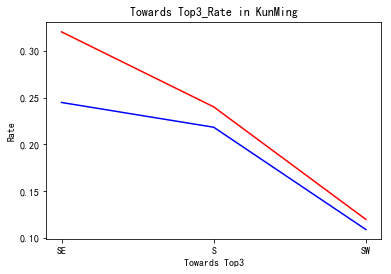

In [42]:
plt.plot(['SE', 'S', 'SW'], [km_tow_map['SE'], km_tow_map['S'], km_tow_map['SW']], c='blue')
plt.plot(['SE', 'S', 'SW'], [km_popular50_tow_map['SE'], km_popular50_tow_map['S'], km_popular50_tow_map['SW']], c='red')
plt.xlabel("Towards Top3")
plt.ylabel("Rate")
plt.title("Towards Top3_Rate in KunMing")
plt.show()

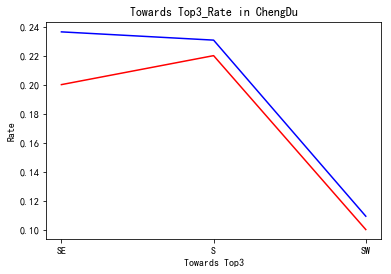

In [43]:
plt.plot(['SE', 'S', 'SW'], [cd_tow_map['SE'], cd_tow_map['S'], cd_tow_map['SW']], c='blue')
plt.plot(['SE', 'S', 'SW'], [cd_popular50_tow_map['SE'], cd_popular50_tow_map['S'], cd_popular50_tow_map['SW']], c='red')
plt.xlabel("Towards Top3")
plt.ylabel("Rate")
plt.title("Towards Top3_Rate in ChengDu")
plt.show()

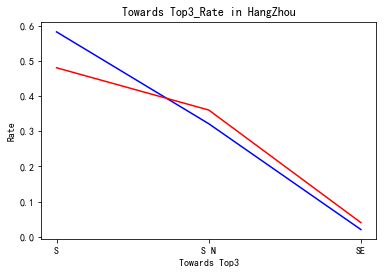

In [44]:
plt.plot(['S', 'S N', 'SE'], [hz_tow_map['S'], hz_tow_map['S N'], hz_tow_map['SE']], c='blue')
plt.plot(['S', 'S N', 'SE'], [hz_popular50_tow_map['S'], hz_popular50_tow_map['S N'], hz_popular50_tow_map['SE']], c='red')
plt.xlabel("Towards Top3")
plt.ylabel("Rate")
plt.title("Towards Top3_Rate in HangZhou")
plt.show()

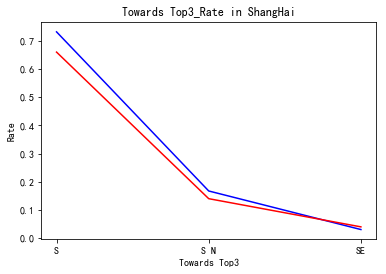

In [45]:
plt.plot(['S', 'S N', 'SE'], [sh_tow_map['S'], sh_tow_map['S N'], sh_tow_map['SE']], c='blue')
plt.plot(['S', 'S N', 'SE'], [sh_popular50_tow_map['S'], sh_popular50_tow_map['S N'], sh_popular50_tow_map['SE']], c='red')
plt.xlabel("Towards Top3")
plt.ylabel("Rate")
plt.title("Towards Top3_Rate in ShangHai")
plt.show()

### 结论：根据以上图表能看出，不同城市的所有房产中朝向TOP3的房产，与popular前50的房产朝向的走势具有一致性。这表明，受欢迎程度（popular）较高的房产，其朝向为 TOP3 的概率也较大，客户对该类房产的青睐程度均较高。

## 假设检验
#### (2) 上海市和杭州市，朝向为'S'的房产，受欢迎程度popular 的均值是否有明显差异？
 - 零假设 H_0: 上海市和杭州市，朝向为'S'的房产，受欢迎程度popular 的均值没有明显差异
 - 备择假设 H_a: 上海市和杭州市，朝向为'S'的房产，受欢迎程度popular 的均值有明显差异

In [46]:
# 选取上海和杭州朝向为'S'的房产信息
hz_towards_S = hz[hz.towards=='S']
sh_towards_S = sh[sh.towards=='S']

In [47]:
# 全部朝向为'S'的房产popular均值
hz_towards_S['popular'].mean()

0.58256251435132

In [48]:
# 全部朝向为'S'的房产popular均值
sh_towards_S['popular'].mean()

1.4595817224003655

In [49]:
# 从满足条件的房产数据中随机抽取 1500个样本
import random
hz_towards_S_sample = random.sample(list(hz_towards_S['popular']), 1500)
sh_towards_S_sample = random.sample(list(sh_towards_S['popular']), 1500)
# 样本的 popular均值
hz_mean_S = np.mean(hz_towards_S_sample)
sh_mean_S = np.mean(sh_towards_S_sample)

In [50]:
print("杭州和上海朝向为'S' 的样本popular均值的差值： ", hz_mean_S - sh_mean_S)

杭州和上海朝向为'S' 的样本popular均值的差值：  -0.8532597999999999


### t 统计量的计算公式：
## t = (x_mean - u) / (S/sqrt(n))

#### 说明：
 - x_mean: 样本均值
 - u: 假设的均值
 - S: 标准差
 - n: 样本容量
 
#### t-值或t-统计量基本上是测量信号强度(差值)对数据中噪声量(变化)的度量，这就是我们如何在一个样本t检验中计算t值。然而，为了计算两个样本的总体均值，或者在我们的情况下，我们将使用下面的方程。
 
 ## t = (x_A - x_B) / sqrt(S *(1/n_A + 1/n_B)^0.5 )
 - 这里用另一个样本平均数代替我们的假设均值，而两个样本大小对应一个样本大小。
 - x_A: 样本A的平均值
 - x_B: 样本B的平均值
 - n_A | n_B: 这是每组观测的样本数
 - S: 样本方差

In [51]:
import scipy.stats as stats

In [52]:
# 计算独立双样本 t 检验的 T统计量以及 p_value
t = stats.ttest_ind(hz_towards_S_sample, sh_towards_S_sample).statistic
p_value = stats.ttest_ind(hz_towards_S_sample, sh_towards_S_sample).pvalue
print("检验统计量t: ", t)
print("t检验的 p-value: ", p_value)

检验统计量t:  -21.598281947741206
t检验的 p-value:  2.8186259829813558e-96


### 结论：
 - (1)从计算结果t=-21.598, 可以看出杭州市朝向为'S'的房产受欢迎程度popular比上海市低了21.598倍的标准差
 - (2)p_value= 2.818*e-96 远远小于显著性水平α=0.05，可知观测样本具有统计显著性。因此要拒绝原假设H_0,采用备择假设H_a, 即“上海市和杭州市，朝向为'S'的房产，受欢迎程度popular 的均值有明显差异”，差异为均值的21.598倍标准差。